In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

import time

from skimage.feature import hog

%matplotlib inline

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

from imp import reload
#reload(cc)
#reload(ip)

C:\Users\carlos\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


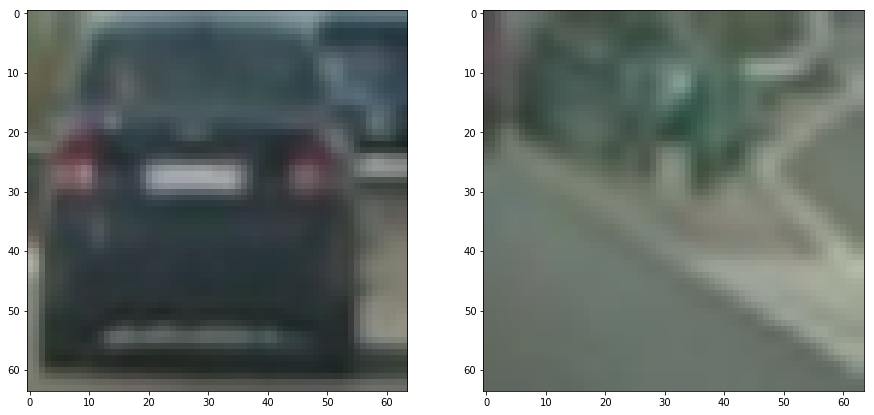

In [2]:
imageVehicle = mpimg.imread('./data/vehicles/GTI_MiddleClose/image0000.png')
imageNonVehicle = mpimg.imread('./data/non-vehicles/GTI/image4.png')

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(imageVehicle)
plt.subplot(1,2,2)
plt.imshow(imageNonVehicle)  

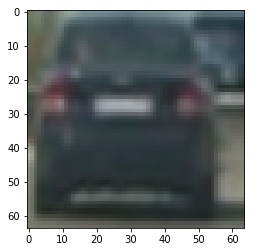

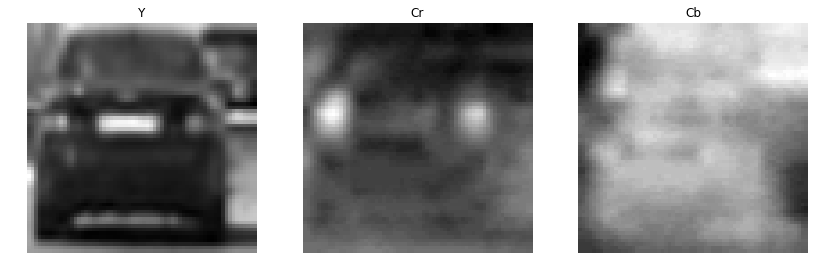

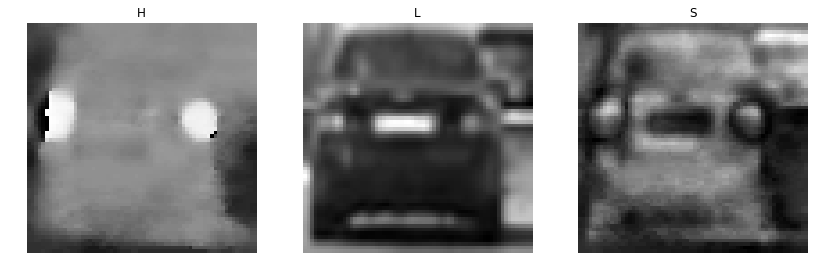

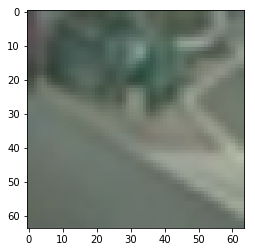

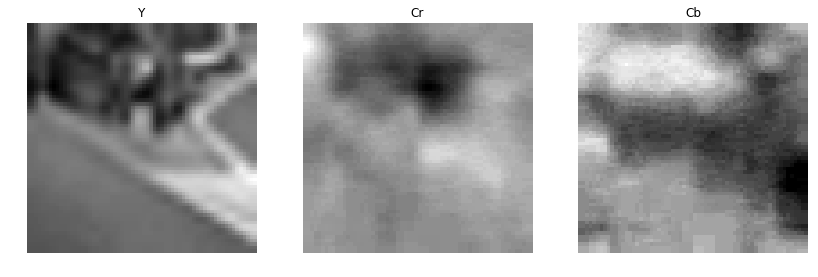

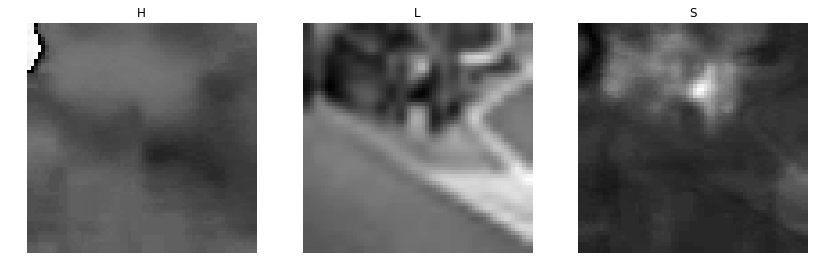

In [3]:
def printImageComponents(image, titles):
    fig = plt.figure(figsize=(14,10))
    for i in [0,1,2]:
        plt.subplot(1,3,i+1)
        plt.axis('off')
        plt.imshow(image[:,:,i], cmap='gray')
        plt.title(titles[i])
        
def printImageComparisons(img):
    plt.figure()
    plt.imshow(img)
    printImageComponents(cv2.cvtColor(img,cv2.COLOR_RGB2YCrCb), ['Y','Cr','Cb'])
    printImageComponents(cv2.cvtColor(img,cv2.COLOR_RGB2HLS), ['H','L','S'])

    
printImageComparisons(imageVehicle)
printImageComparisons(imageNonVehicle)

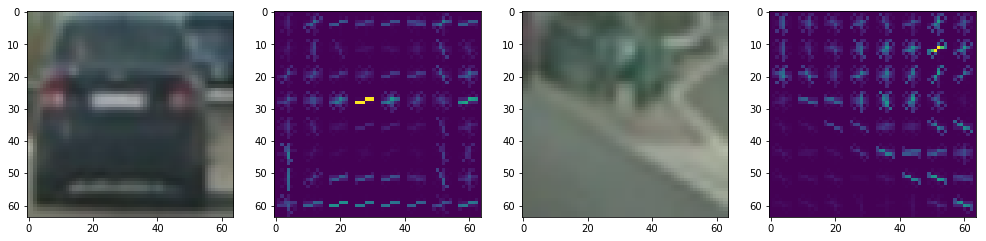

In [4]:

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        # Use skimage.hog() to get both features and a visualization
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), cells_per_block=(cell_per_block, cell_per_block), visualise=vis, feature_vector=feature_vec)
        
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), cells_per_block=(cell_per_block, cell_per_block), visualise=False, feature_vector=feature_vec)

        return features
    
    
imageVehicleY = cv2.cvtColor(imageVehicle,cv2.COLOR_RGB2YCrCb)[:,:,0]
imageNonVehicleY = cv2.cvtColor(imageNonVehicle,cv2.COLOR_RGB2YCrCb)[:,:,0]
orient = 9
pix_per_cell = 8
cell_per_block = 2

features_vehicle, hog_image_vehicle = get_hog_features(imageVehicleY, orient, pix_per_cell, cell_per_block, True, True)
features_non_vehicle, hog_image_non_vehicle = get_hog_features(imageNonVehicleY, orient, pix_per_cell, cell_per_block, True, True)

plt.figure(figsize=(17,8))
plt.subplot(1,4,1)
plt.imshow(imageVehicle)
plt.subplot(1,4,2)
plt.imshow(hog_image_vehicle)  

plt.subplot(1,4,3)
plt.imshow(imageNonVehicle)
plt.subplot(1,4,4)
plt.imshow(hog_image_non_vehicle)  

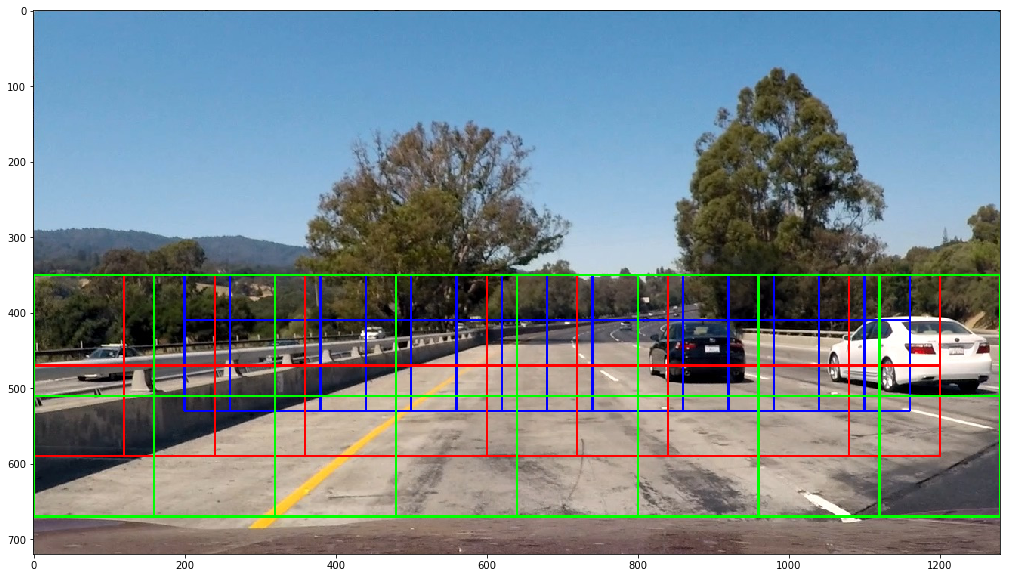

In [5]:
import window_slider as ws
reload(ws)
#
# Windows
#

testimage = mpimg.imread('./test_images/test1.jpg')

windows1 = ws.slide_window(testimage, x_start_stop=[200, 1200], y_start_stop=[350, 550], 
                    xy_window=(60, 60), xy_overlap=(0, 0))
                       
window_img = ws.draw_boxes(testimage, windows1, color=(0, 0, 255), thick=2)    

windows2 = ws.slide_window(testimage, x_start_stop=[None, None], y_start_stop=[350, 650], 
                    xy_window=(120, 120), xy_overlap=(0, 0))
                       
window_img = ws.draw_boxes(window_img, windows2, color=(255, 0, 0), thick=2)  

windows3 = ws.slide_window(testimage, x_start_stop=[None, None], y_start_stop=[350, None], 
                    xy_window=(160,160), xy_overlap=(0, 0))
                       
window_img = ws.draw_boxes(window_img, windows3, color=(0, 255, 0), thick=2)  


plt.figure(figsize=(20,10))
plt.imshow(window_img)

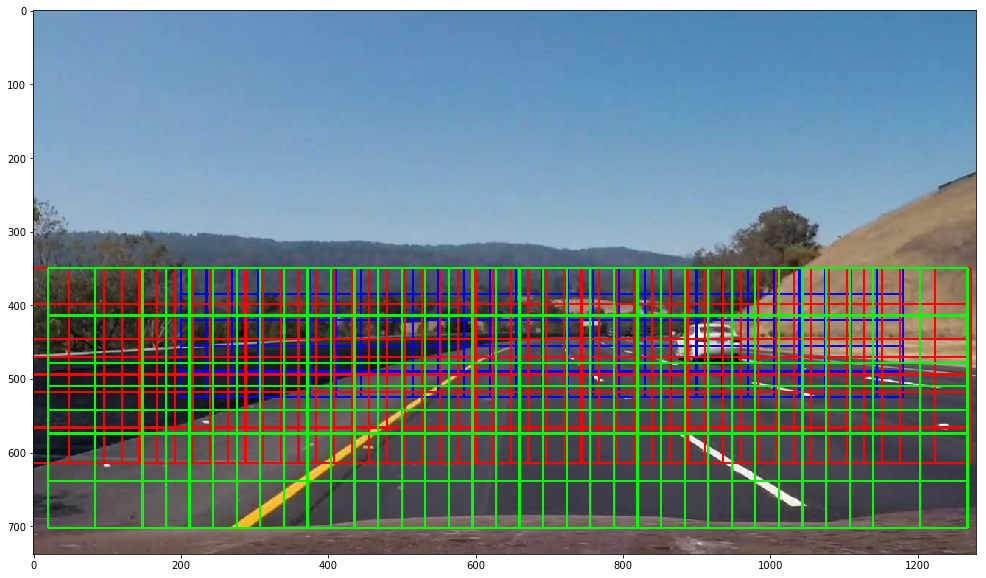

In [6]:
import window_slider as ws
reload(ws)
#
# Windows
#

testimage = mpimg.imread('./test_images/test1.jpg')
testimage = mpimg.imread('carlos1.jpg')

windows1 = ws.slide_window(testimage, x_start_stop=[200, 1200], y_start_stop=[350, 550], 
                    xy_window=(70, 70), xy_overlap=(0.5, 0.5))
                       
window_img = ws.draw_boxes(testimage, windows1, color=(0, 0, 255), thick=2)    

windows2 = ws.slide_window(testimage, x_start_stop=[None, None], y_start_stop=[350, 650], 
                    xy_window=(120, 120), xy_overlap=(.6, .6))
                       
window_img = ws.draw_boxes(window_img, windows2, color=(255, 0, 0), thick=2)  

windows3 = ws.slide_window(testimage, x_start_stop=[20, None], y_start_stop=[350, None], 
                    xy_window=(160,160), xy_overlap=(0.6, 0.6))
                       
window_img = ws.draw_boxes(window_img, windows3, color=(0, 255, 0), thick=2)  


plt.figure(figsize=(20,10))
plt.imshow(window_img)


In [7]:
# Read in cars and notcars
# Read in cars and notcars
imagescars = glob.glob('./data/vehicles/*/*.png')

cars = []

for image in imagescars:
    cars.append(image)

imagesnocars = glob.glob('./data/non-vehicles/*/*.png')
notcars = []
for image in imagesnocars:
    notcars.append(image)
    
    
# Reduce the sample size because
# The quiz evaluator times out after 13s of CPU time
sample_size = 5000
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]


In [8]:
### TODO: Tweak these parameters and see how the results change.
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 0 # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = False # Spatial features on or off
hist_feat = False # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()

In [9]:
from lesson_functions import *

In [10]:
car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)



In [11]:
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)



In [12]:
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 1764
4.24 Seconds to train SVC...
Test Accuracy of SVC =  0.944


In [13]:
image = mpimg.imread('./test_images/test5.jpg')

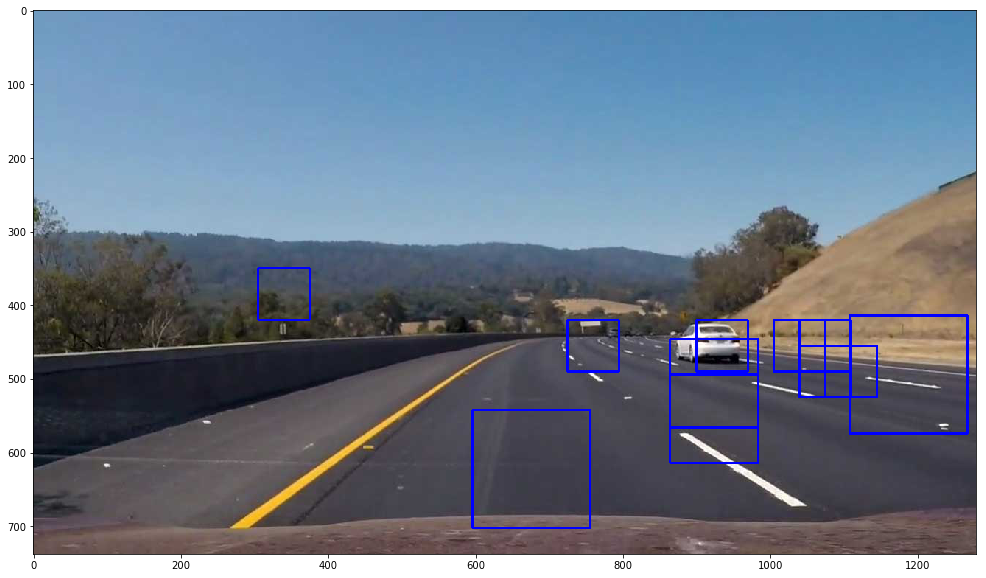

In [14]:
windows = windows1 + windows2 + windows3
#windows.extend(windows2)

hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(image, hot_windows, color=(0, 0, 255), thick=2)                    

plt.figure(figsize=(20,10))
plt.imshow(window_img)

In [15]:
#
# Heat map
#
from scipy.ndimage.measurements import label
import heat_maps as hm
reload(hm)

<module 'heat_maps' from 'D:\\github\\CarND-Vehicle-Detection-master\\heat_maps.py'>

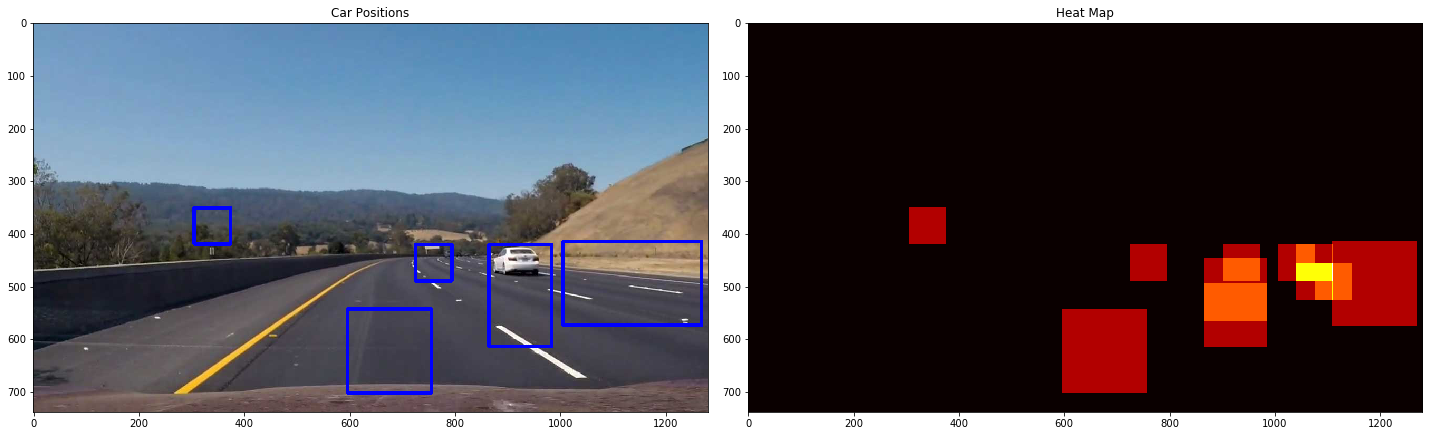

In [16]:
heat = np.zeros_like(image[:,:,0]).astype(np.float)

heat = hm.add_heat(heat,hot_windows)

# Apply threshold to help remove false positives
heat = hm.apply_threshold(heat,0)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = hm.draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()


In [17]:
import cardetection as cd
reload(cd)

# Read in cars and notcars
# Read in cars and notcars
imagescars = glob.glob('./data/vehicles/*/*.png')
cars = []
for image in imagescars:
    cars.append(image)
imagesnocars = glob.glob('./data/non-vehicles/*/*.png')
notcars = []
for image in imagesnocars:
    notcars.append(image)
    
print("Number of cars:" , len(cars))
print("Number of no cars:", len(notcars))


Number of cars: 8792
Number of no cars: 8968


In [18]:
import cardetection as cd
reload(cd)

cd = cd.CarDetection()
cd.spatial_feat = True
cd.hist_feat = True
cd.hog_channel = 'ALL'

cd.threshold_heat = 10

cd.buildModel(cars[0:10000], notcars[0:10000])


Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8412
21.31 Seconds to train SVC...
Test Accuracy of SVC =  0.9901


In [19]:
from sklearn.externals import joblib
joblib.dump(cd.svc, 'model.pkl')
joblib.dump(cd.X_scaler, 'scaler.pkl')


['scaler.pkl']

In [20]:
import cardetection as cd
reload(cd)

cd = cd.CarDetection()
cd.svc = joblib.load("model.pkl")
cd.X_scaler = joblib.load("scaler.pkl")

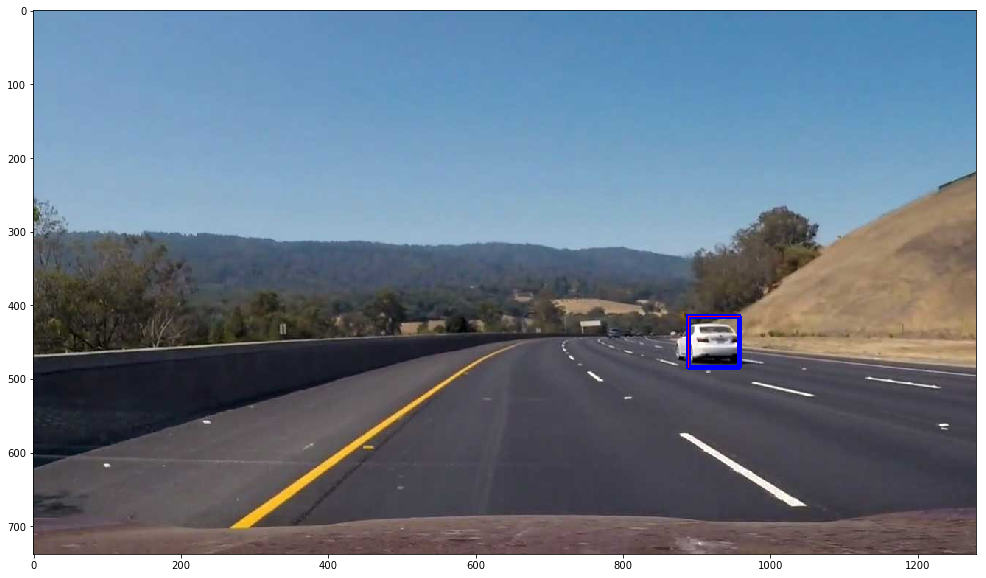

In [21]:

image = mpimg.imread('./test_images/test6.jpg')
image = mpimg.imread('carlos1.jpg')
cd.threshold_heat = 0
cd.windows = None
cd.hot_windows = []
cd.addBoxesFound = True

fig = plt.figure(figsize=(20,10))
plt.imshow(cd.processImage(image))

In [22]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

new_clip_output = 'test_video_output.mp4'
test_clip = VideoFileClip("test_video.mp4")


In [23]:
cd.threshold_heat = 15
cd.windows = None
cd.hot_windows = []
cd.lastFrames = 10
cd.addHeatMapView = True
cd.addBoxesFound = False
    
new_clip = test_clip.fl_image(lambda x: cd.processImage(x)) 
%time new_clip.write_videofile(new_clip_output, audio=False)


[MoviePy] >>>> Building video test_video_output.mp4
[MoviePy] Writing video test_video_output.mp4


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 38/39 [02:06<00:03,  3.25s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_output.mp4 

Wall time: 2min 7s


In [24]:
HTML("""
<video width="640" height="480" controls>
  <source src="{0}" type="video/mp4">
</video>
""".format(new_clip_output))

In [25]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

project_clip_output = 'project_video_output.mp4'
project_clip = VideoFileClip("project_video.mp4")

In [28]:
cd.threshold_heat = 16
cd.windows = None
cd.hot_windows = []
cd.lastFrames = 12
cd.addHeatMapView = True
cd.addBoxesFound = False

new_clip = project_clip.fl_image(lambda x: cd.processImage(x)) 
%time new_clip.write_videofile(project_clip_output, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [1:08:33<00:03,  3.38s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

Wall time: 1h 8min 34s


In [35]:
HTML("""
<video width="640" height="300" controls>
  <source src="{0}" type="video/mp4">
</video>
""".format(project_clip_output))